> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and preview data
- Inspect distributions and identify missing or unusual data
- Deal with outliers or skew
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

This week we will use data on Bay Area Craigslist rental housing posts.

Source: Pennington, Kate (2018). Bay Area Craigslist Rental Housing Posts, 2000-2018. Retrieved from https://github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Libraries and Data

### Instructions:
- Import the `pandas`, `matplotlib` and `seaborn` libraries.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [2]:
# import any libraries that you wish to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
# we can use a function in pandas called read_csv() to read in csv files.
# Similarly there are other functions such as  read_excel(), read_json(), read_html() etc
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [89]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


### 🔧 Task 1 - Try It Yourself

1. Add one line of code to print the number of rows and columns. To get the size of the table, use the .shape attribute of the Dataframe.

In [90]:
# Add code here 🔧
print(df.shape)

(200796, 17)


## Part 2: Inspecting, Cleaning & Removing Outliers

### Instructions:
- Identify whether variables have missing values.
- Check data types (e.g., dates, numeric columns). These are inferred. Do they look appropriate?
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`. Outliers are extreme or unusally low or high values compared to most others.



In [107]:
# Check for missing values - get a count for each column
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [92]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


In [93]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


Data types are inferred.
- Numeric valus are either `int` (discrete, whole numbers with no limit) or `float` (continuous decimals with no limit). 64 is the default number of bits used to store the int or float.
- String/text is stored as `object`.
- Note that the inferred datatypes are not always ideal. For instance categorical is not used automatically. We have to set that. `categorical` is best when there are only a limited number of allowed values in the data. This can be numerical variables (0 or 1) or text variables with only some values to choose from (nhood, city, county)



In [6]:
#change the following object and int variables to categorical
df['nhood']=df['nhood'].astype('category')
df['city']=df['city'].astype('category')
df['county']=df['county'].astype('category')
df['room_in_apt']=df['room_in_apt'].astype('category')


### Outlier analysis
To see whether a variable contains outlier (points that are very different in value from the rest), we can create a **boxplot** of the variable.

In a boxplot, the box covers the interquartile range (IQR) from 25-75 percentile of the data, and the whiskers (T lines) extend to a certain range (often 1.5 times the IQR) from the box. Any data points that fall outside of this whisker range are considered outliers and are plotted individually as points.

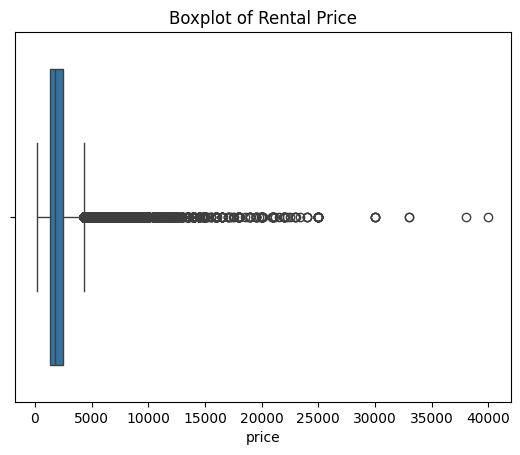

In [94]:
# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show()

In [95]:
# Remove price outliers (keep 1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

In [96]:
#check the shape to see how many rows were removed/lost when we dropped outliers in price
df.shape

(197021, 17)

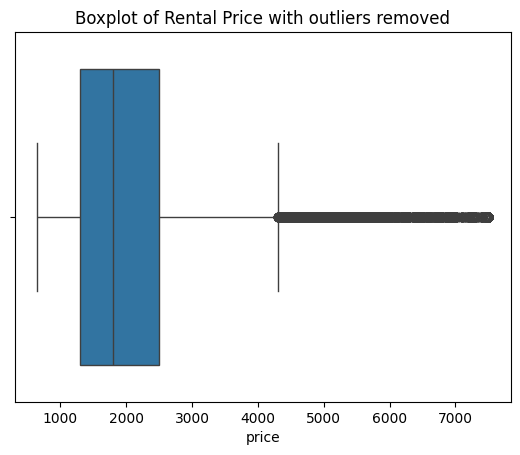

In [97]:
# the plot should have fewer outliers now - see for yourself
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price with outliers removed")
plt.show()

### 🔧 Try It Yourself – Part 2

1. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

2. What patterns or issues do you see with square footage values? Is there anything unusual? You dont need to remove the outliers here - leave them.


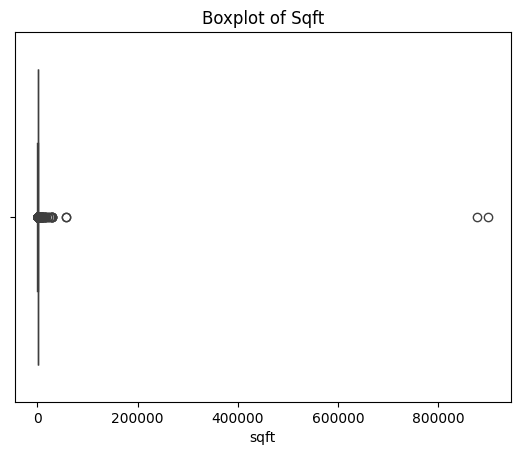

In [98]:
# Add code here 🔧
df['sqft'].describe()

sns.boxplot(x=df['sqft'])
plt.title("Boxplot of Sqft")
plt.show()

🔧 Add comment here:

There are some very  large outliers that lie so far out - very large homes.

## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [99]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
inverness,5310.000000
tiburon / belvedere,3470.911197
SOMA / south beach,3450.726223
financial district,3431.484935
saratoga,3393.803279
west portal / forest hills,3302.753388
NOPA,3186.456667
pacific heights,3022.314860
candlestick point,3011.316239


In [100]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


In [101]:
# Add code here 🔧
display(df.groupby('year')['price'].mean())

display(df['room_in_apt'].value_counts())

,price
year,
2000,1510.952381
2001,2009.739310
2002,1669.556738
2003,1573.383743
2004,1642.277840
2005,1506.983871
2006,1764.345831
2007,2033.602596
2008,2010.951895


,count
room_in_apt,
0,196767
1,254


🔧 Add comment here:

Prices are going up every year but not consistently so, there are some years where the avg rental price dipped.

There are certainly many many more whole home rentals than there are room in home rentals.


## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [102]:
!jupyter nbconvert --to html "lab_04_LastnameFirstname.ipynb"

[NbConvertApp] WARNING | pattern 'lab_04_LastnameFirstname.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
